In [1]:
import os
import re
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
log_dir = "./ping_logs"
pattern = re.compile(r'time=([\d.]+) ms')
data = []

In [5]:
for filename in os.listdir(log_dir):
    filepath = os.path.join(log_dir, filename)
    
    # Extract environment, size, and mode
    parts = filename.split("_")
    environment = parts[0] + parts[1]  # e.g., LocalNetwork
    size = int(parts[5][1:])  # 's64' -> 64
    mode = int(parts[6].split('.')[0][1:])  # 'm1.log' -> 1

    with open(filepath, 'r') as file:
        times = [float(match.group(1)) for line in file for match in [pattern.search(line)] if match]
        if times:
            avg_time = sum(times) / len(times)
            data.append({"Environment": environment, "Size": size, "Mode": mode, "AverageRTT": avg_time})

df = pd.DataFrame(data)

In [6]:
df

,Environment,Size,Mode,AverageRTT
0,LocalToVM192,512,2,0.24933
1,LocalNetwork192,512,1,127.64375
2,LocalNetwork192,64,3,114.56041
3,LocalNetwork192,64,2,80.73951
4,LocalToVM192,512,3,0.39920
5,LocalToVM192,512,1,0.54932
6,LocalNetwork192,512,2,68.65651
7,LocalNetwork192,64,1,117.20188
8,LocalNetwork192,512,3,96.15643
9,LocalNetwork192,1472,2,109.18763


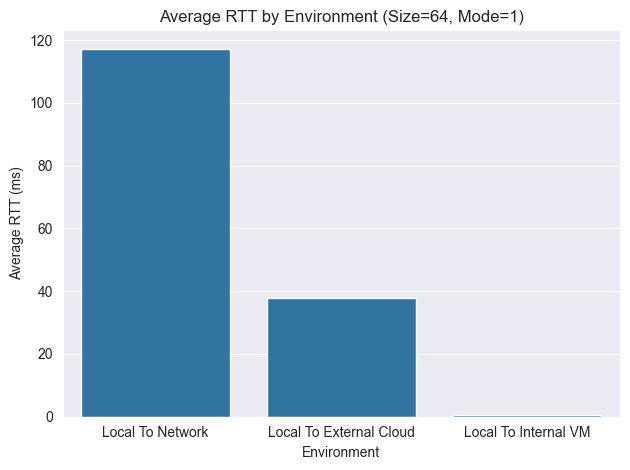

In [8]:
# Rename environments for clarity
df['Environment'] = df['Environment'].replace({
    'LocalNetwork192': 'Local To Network',
    'LocalToVM192': 'Local To Internal VM',
    'LocalToCloud1': 'Local To External Cloud',
})

subset = df[(df['Size'] == 64) & (df['Mode'] == 1)]

sns.barplot(data=subset, x='Environment', y='AverageRTT')
plt.title('Average RTT by Environment (Size=64, Mode=1)')
plt.ylabel('Average RTT (ms)')
plt.xlabel('Environment')
plt.tight_layout()
plt.show()

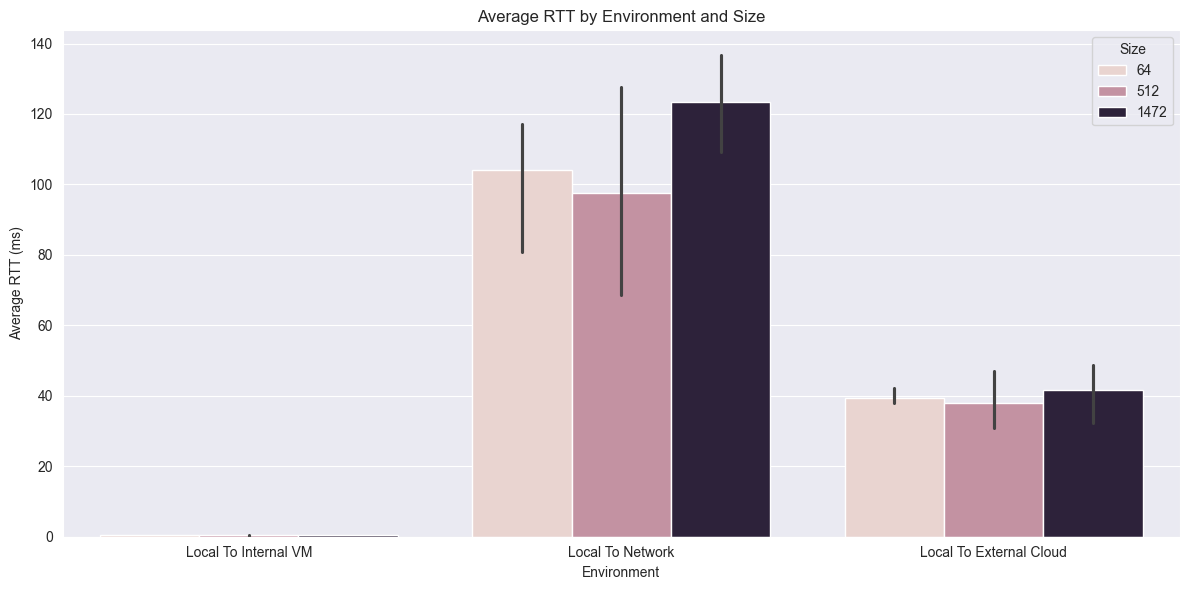

In [9]:
# Plotting all data
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='Environment', y='AverageRTT', hue='Size')
plt.title('Average RTT by Environment and Size')
plt.ylabel('Average RTT (ms)')
plt.xlabel('Environment')
plt.legend(title='Size')

plt.tight_layout()
plt.show()

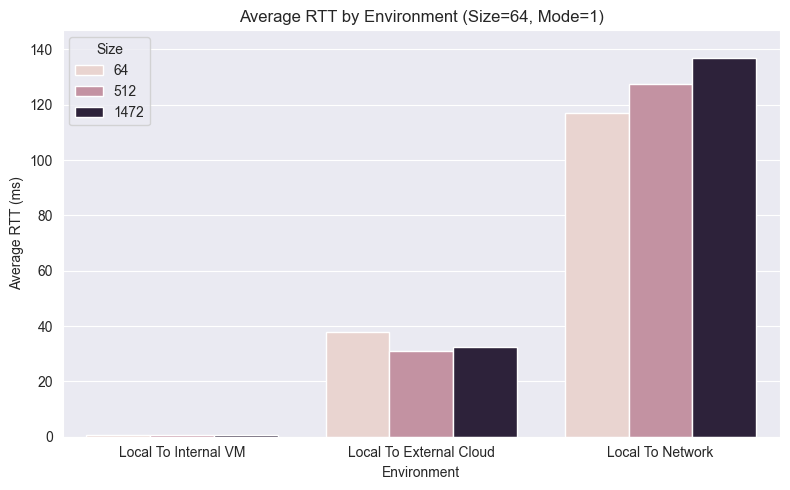

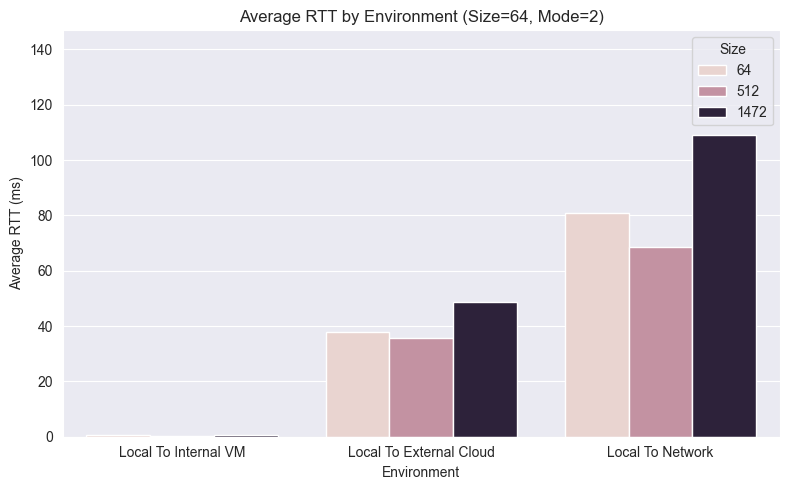

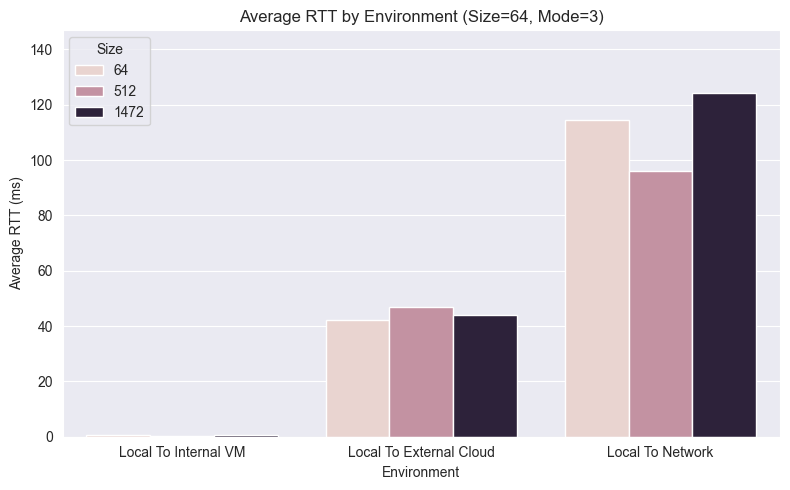

In [15]:
env_order = ['Local To Internal VM', 'Local To External Cloud', 'Local To Network']

for mode in [1, 2, 3]:
    subset = df[(df['Mode'] == mode)]

    plt.figure(figsize=(8, 5))
    sns.barplot(data=subset, x='Environment', y='AverageRTT', hue='Size', order=env_order)
    plt.title(f'Average RTT by Environment (Size=64, Mode={mode})')
    plt.ylabel('Average RTT (ms)')
    plt.xlabel('Environment')
    plt.ylim(0, df['AverageRTT'].max() + 10)  # Optional: consistent y-axis
    plt.tight_layout()
    
    filename = f"average_rtt_mode{mode}.png"
    plt.savefig(filename)
    plt.show()
